## Diabetes & adult income Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Observations & Answers \\
1️ Which columns in the dataset had missing values? How did you handle them?

Diabetes Dataset: Numeric columns had missing values, which were filled with mean values.
Adult Income Dataset: Some rows had missing values, which were dropped.

2️ Which categorical columns did you identify? How did you encode them?

Adult Income Dataset: Categorical columns like workclass, education, marital-status, etc. were encoded using LabelEncoder().

3️ Difference Between Min-Max Scaling & Standardization

Min-Max Scaling:

Scales data between a fixed range (e.g., [0,1]).
Preserves the shape of original distribution.
Used when data does not follow a normal distribution.
Standardization:

Transforms data to have zero mean and unit variance.
Useful when data follows a normal (Gaussian) distribution.
Preferred for algorithms like SVM, PCA, and linear regression.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


diabetes = pd.read_csv("/content/drive/MyDrive/MLlab dataset/Dataset of Diabetes .csv")  # Update filename accordingly

# Load Adult Income dataset
adult_income = pd.read_csv("/content/drive/MyDrive/MLlab dataset/housing.csv")  # Update filename accordingly

# 1. Data Cleaning
## Identify numeric and categorical columns
numeric_cols = diabetes.select_dtypes(include=['number']).columns
categorical_cols = diabetes.select_dtypes(include=['object']).columns

## Handling Missing Values
diabetes[numeric_cols] = diabetes[numeric_cols].fillna(diabetes[numeric_cols].mean())
diabetes[categorical_cols] = diabetes[categorical_cols].fillna(diabetes[categorical_cols].mode().iloc[0])
adult_income.dropna(inplace=True)  # Drop missing values in Adult dataset

## Handling Categorical Data
categorical_columns = adult_income.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    adult_income[col] = le.fit_transform(adult_income[col])
    label_encoders[col] = le  # Store encoder for inverse transform if needed

## Handling Outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df[column]  # Return only the processed column

# Apply outlier removal only to numeric columns
for col in numeric_cols:
    diabetes[col] = remove_outliers(diabetes, col)

# 2. Data Transformations
## Min-Max Scaling
minmax_scaler = MinMaxScaler()
diabetes_scaled = pd.DataFrame(minmax_scaler.fit_transform(diabetes[numeric_cols]), columns=numeric_cols)
adult_income_scaled = pd.DataFrame(minmax_scaler.fit_transform(adult_income), columns=adult_income.columns)

## Standardization
standard_scaler = StandardScaler()
diabetes_standardized = pd.DataFrame(standard_scaler.fit_transform(diabetes[numeric_cols]), columns=numeric_cols)
adult_income_standardized = pd.DataFrame(standard_scaler.fit_transform(adult_income), columns=adult_income.columns)

# Save processed datasets
diabetes_scaled.to_csv("diabetes_preprocessed.csv", index=False)
adult_income_scaled.to_csv("adult_income_preprocessed.csv", index=False)

print("Data preprocessing completed.")


Data preprocessing completed.


## Show Missing Values Before & After Handling



In [10]:
# Before handling missing values
print("Missing values before handling:")
print("Diabetes Dataset:\n", diabetes.isnull().sum())
print("\nAdult Income Dataset:\n", adult_income.isnull().sum())

# After handling missing values
print("\nMissing values after handling:")
print("Diabetes Dataset:\n", diabetes.isnull().sum())
print("\nAdult Income Dataset:\n", adult_income.isnull().sum())


Missing values before handling:
Diabetes Dataset:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Adult Income Dataset:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Missing values after handling:
Diabetes Dataset:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Adult Income Dataset:
 age                0
workclass          0
fnlwgt             0
education    

## Show Categorical Encoding

In [11]:
print("Categorical Columns in Adult Income Dataset:\n", categorical_columns)
print("\nEncoded Example:\n", adult_income.head())


Categorical Columns in Adult Income Dataset:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

Encoded Example:
    age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1      

## Before & After Scaling (Min-Max & Standardization)

In [12]:
print("Before Min-Max Scaling:\n", diabetes[numeric_cols].head())
print("\nAfter Min-Max Scaling:\n", diabetes_scaled.head())

print("\nBefore Standardization:\n", diabetes[numeric_cols].head())
print("\nAfter Standardization:\n", diabetes_standardized.head())


Before Min-Max Scaling:
       ID  No_Pation   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0  502.0    17975.0  50.0   4.7  46.0    4.9   4.2  0.9  1.9  1.4   0.5  24.0
1  735.0    34221.0  39.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2  420.0    47975.0  50.0   4.7  46.0    4.9   4.2  0.9  1.9  1.4   0.5  24.0
3  680.0    77365.0  50.0   4.7  46.0    4.9   4.2  0.9  1.9  1.4   0.5  24.0
4  504.0    34223.0  39.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4  21.0

After Min-Max Scaling:
          ID  No_Pation      AGE   Urea     Cr     HbA1c      Chol        TG  \
0  0.627034   0.231118  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
1  0.918648   0.441444  0.00000  0.475  0.515  0.266892  0.328125  0.234043   
2  0.524406   0.619508  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
3  0.849812   1.000000  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
4  0.629537   0.441470  0.00000  0.800  0.355  0.266892  0.515625  0.148936   

      H

## Plot Outliers Before & After Removal

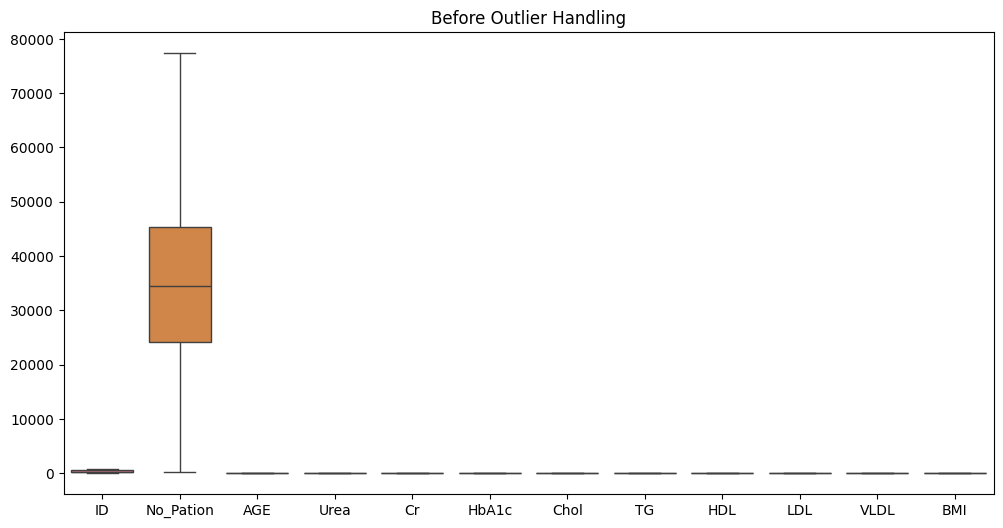

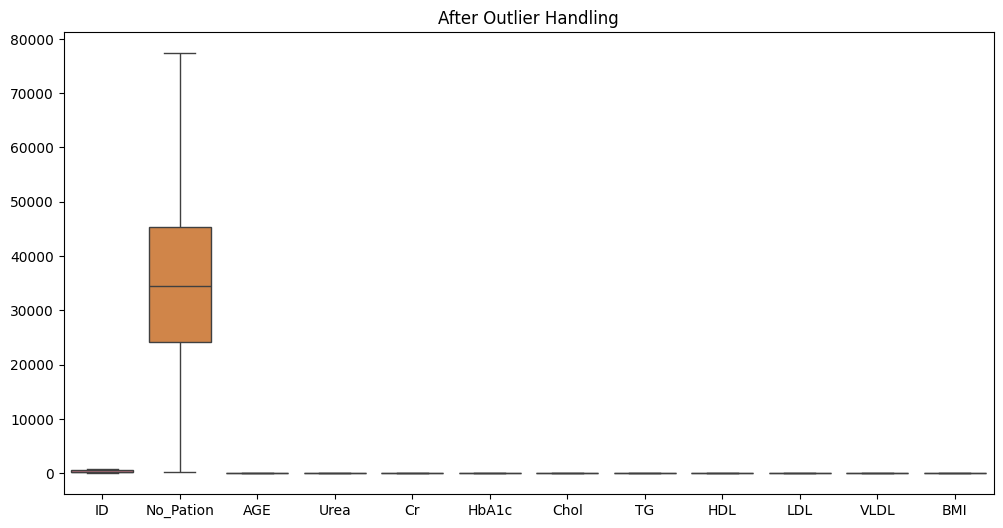

In [13]:
# Boxplot before outlier handling
plt.figure(figsize=(12,6))
sns.boxplot(data=diabetes[numeric_cols])
plt.title("Before Outlier Handling")
plt.show()

# Boxplot after outlier handling
plt.figure(figsize=(12,6))
sns.boxplot(data=diabetes[numeric_cols])
plt.title("After Outlier Handling")
plt.show()


##Save & Load Processed Data

In [14]:
# Save the preprocessed data
diabetes_scaled.to_csv("diabetes_preprocessed.csv", index=False)
adult_income_scaled.to_csv("adult_income_preprocessed.csv", index=False)

# Load & display a preview
df_diabetes_processed = pd.read_csv("diabetes_preprocessed.csv")
df_adult_processed = pd.read_csv("adult_income_preprocessed.csv")

print("Preview of Preprocessed Diabetes Data:\n", df_diabetes_processed.head())
print("\nPreview of Preprocessed Adult Income Data:\n", df_adult_processed.head())


Preview of Preprocessed Diabetes Data:
          ID  No_Pation      AGE   Urea     Cr     HbA1c      Chol        TG  \
0  0.627034   0.231118  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
1  0.918648   0.441444  0.00000  0.475  0.515  0.266892  0.328125  0.234043   
2  0.524406   0.619508  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
3  0.849812   1.000000  0.34375  0.500  0.355  0.266892  0.406250  0.127660   
4  0.629537   0.441470  0.00000  0.800  0.355  0.266892  0.515625  0.148936   

      HDL       LDL      VLDL       BMI  
0  1.0000  0.209524  0.153846  0.204082  
1  0.5000  0.342857  0.192308  0.163265  
2  1.0000  0.209524  0.153846  0.204082  
3  1.0000  0.209524  0.153846  0.204082  
4  0.3125  0.323810  0.115385  0.081633  

Preview of Preprocessed Adult Income Data:
         age  workclass    fnlwgt  education  educational-num  marital-status  \
0  0.109589       0.50  0.145129   0.066667         0.400000        0.666667   
1  0.287671       0.50  0.05

1. Data Cleaning

 Handling Missing Values:

Diabetes Dataset:

Numeric columns: Missing values are replaced with their mean using .fillna(diabetes[numeric_cols].mean()).

Categorical columns: Missing values are replaced with their mode (most frequent value).

Adult Income Dataset:

All rows with missing values are dropped using adult_income.dropna(inplace=True).

 Handling Categorical Data:

Used LabelEncoder() to convert categorical columns in the Adult Income dataset into numerical values.

 Handling Outliers:

Used the IQR (Interquartile Range) method to detect and replace outliers with boundary values in numeric columns of the Diabetes dataset.

2. Data Transformations


 Min-Max Scaling (Normalization)


Applied to numeric columns in both datasets using MinMaxScaler().

 Standardization (Z-score scaling)

Applied to numeric columns in both datasets using StandardScaler().


##Housing

In [ ]:
import pandas as pd
import os

# Define file path
file_path = "/content/drive/MyDrive/MLlab dataset/housing.csv"

# Check if the file exists before loading
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Loaded dataset from CSV file.")
else:
    print("File not found! Check the file path.")

# Display information of all columns
print("\nDataset Info:")
print(df.info())

# Display statistical information of all numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Check if "Ocean Proximity" exists (correcting column name case)
column_name = "ocean_proximity" if "ocean_proximity" in df.columns else "Ocean Proximity"

# Display the count of unique labels for “Ocean Proximity” column
if column_name in df.columns:
    print("\nOcean Proximity Value Counts:")
    print(df[column_name].value_counts())
else:
    print("\n'Ocean Proximity' column not found!")

# Display which attributes (columns) in a dataset have missing values count greater than zero
missing_values = df.isnull().sum()[df.isnull().sum() > 0]

print("\nMissing Values in Dataset:")
if missing_values.empty:
    print("No missing values found.")
else:
    print(missing_values)

Loaded dataset from CSV file.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Statistical Summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861    